## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_merge = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
total_mice = len(mouse_data_merge["Mouse ID"].value_counts())

count_mice = pd.DataFrame({"Number of Mice": [total_mice]})
count_mice

,Number of Mice
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_merge.loc[mouse_data_merge.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = pd.DataFrame(duplicate_mice)
all_duplicate_mice

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_merge[mouse_data_merge['Mouse ID'].isin(duplicate_mice)==False]

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_clean_data = clean_df["Mouse ID"].value_counts()
count_mice_clean = len(mice_clean_data)
count_mice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_summary = clean_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_mean = data_summary['Tumor Volume (mm3)'].mean()
drug_median = data_summary['Tumor Volume (mm3)'].median()
drug_stdev = data_summary['Tumor Volume (mm3)'].std()
drug_sem = data_summary['Tumor Volume (mm3)'].sem()

data_summary_group_df = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median,
                                     'Standard Deviation': drug_stdev, 'SEM': drug_sem})
data_summary_group_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_summary_stats = data_summary.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
data_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


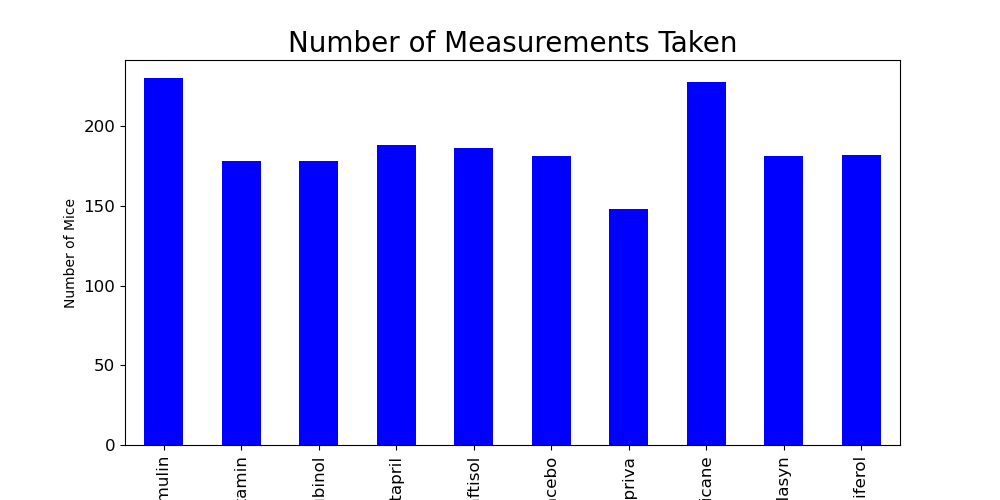

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_measurements = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']
pandas_bar_plot = number_measurements.plot.bar(figsize=(10,5), color='b', fontsize = 12)
pandas_bar_plot
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Measurements Taken",fontsize = 20)

plt.savefig("../images/PandasBarChart.png")
plt.show()
number_measurements

<IPython.core.display.Javascript object>


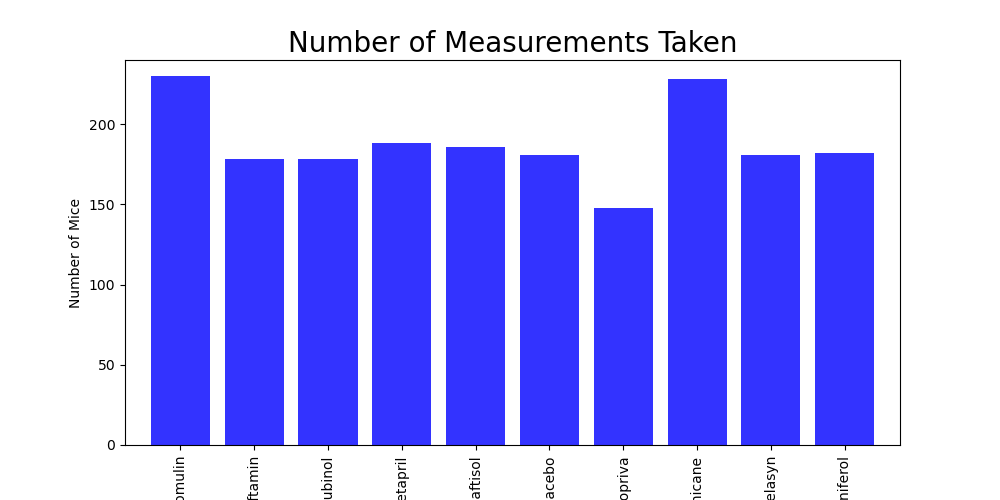

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#count the number of measurements for each drug 
drug_measurement = (clean_df.groupby(["Drug Regimen"])["Mouse ID"].count())
drug_measurement
#Set x axis
x_axis = np.arange(len(number_measurements))
fig1, ax1 = plt.subplots(figsize=(10,5))
plt.bar(x_axis, drug_measurement, color='b', alpha=0.8, align='center')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_measurement)+10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Measurements Taken",fontsize = 20)

plt.savefig("../images/PypoltBarChart.png")

drug_measurement

In [12]:
#count mice by gender and percentage
group_gender = clean_df.groupby(["Mouse ID", "Sex"])
group_gender_df = pd.DataFrame(group_gender.size())
#data frame to count by gender
mice_gender = pd.DataFrame(group_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]
#Calc Percentage 
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))

mice_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


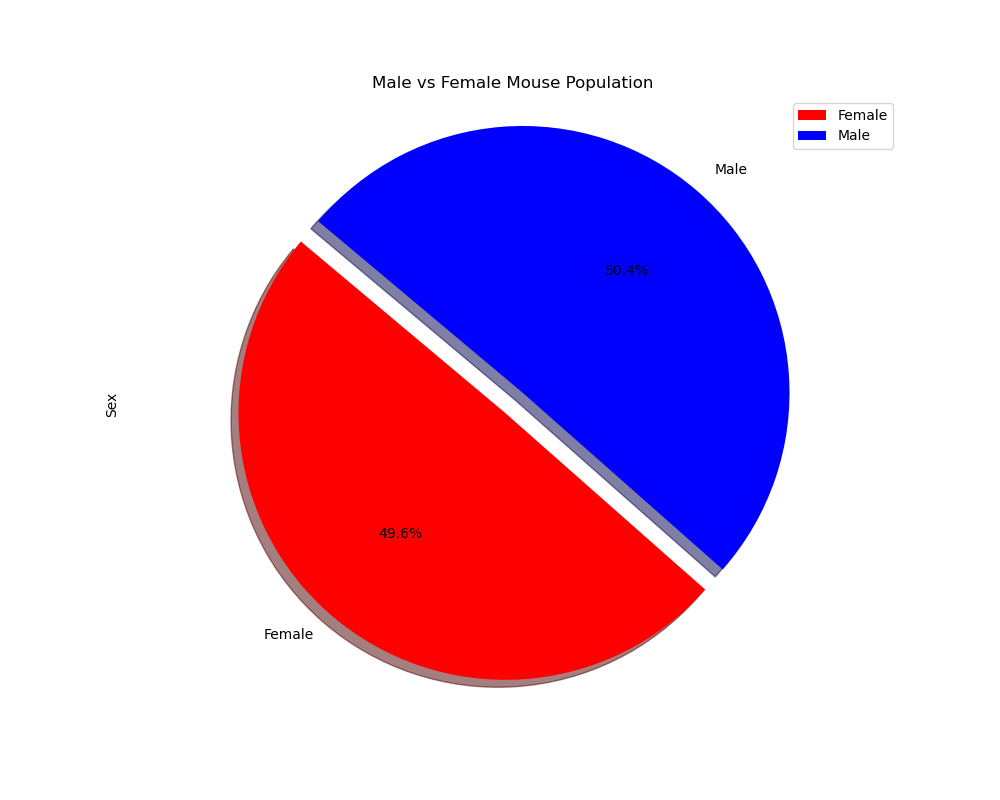

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['red', 'blue']
explode = (0.1, 0)
pie_plot = mice_gender.plot.pie(y='Total Count', figsize=(10,8), colors = colors, startangle=140,
                               explode = explode, shadow = True, autopct = "%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")

plt.savefig("../images/PandasPieChart.png")
plt.show()

<IPython.core.display.Javascript object>


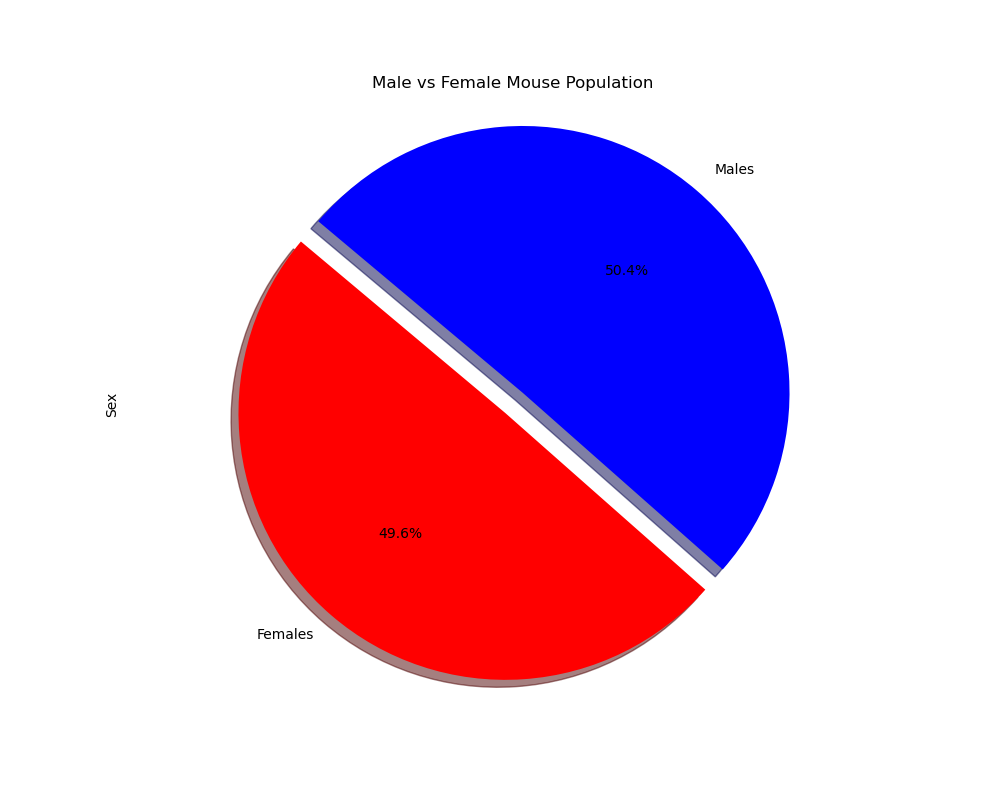

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels for Pie Chart
labels = ["Females", "Males"]
#size values
sizes = [49.596774, 50.403226]
#colors
colors = ['red', 'blue']
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")

plt.savefig("../images/PyPlotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse by Drug regimen
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [17]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor Volume is: {lowerq}")
print(f"The upper quartile of Capomulin Tumor Volume is: {upperq}")
print(f"The interquartile range of Capomulin Tumor Volume is: {iqr}")
print(f"The median of Capomulin Tumor Volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} coulb be outliers.")

The lower quartile of Capomulin Tumor Volume is: 32.37735684
The upper quartile of Capomulin Tumor Volume is: 40.1592203
The interquartile range of Capomulin Tumor Volume is: 7.781863460000004
The median of Capomulin Tumor Volume is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 coulb be outliers.


In [ ]:
#Ramicane

In [ ]:
#Infubinol

In [ ]:
#Ceftamin

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []
for drug in treatment:
    boxplot_list.append(list(final_vol[drug].values))

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.title('Final Tumor Volumen by Drug Regimens')
plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4], treatment, rotation=45)
plt.ylabel('Tumor Volume (mm3)')
plt.boxpolt(boxpolt_list)
plt.ylim(10,80)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
